# Project: No-Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> ### In This Project We'll be analyzing data associated with Medical Appointments In Barazil In particular we'll be interesting in finding data among genders who show their appointment and how it different from genders who didn't show their appointment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Load Dataset and View First rows of it .

In [2]:
df_appointment = pd.read_csv('/home/amira/Desktop/Data Analyst Course/noshowappointments.csv')
df_appointment.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Get Number Of Rows And Columns .

In [3]:
df_appointment.shape

(110527, 14)

### Get Summary Of The Dataset .

In [4]:
df_appointment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Convert Columns To It's Right Data Type

In [5]:
df_appointment['PatientId'] = df_appointment['PatientId'].astype(int)
df_appointment['ScheduledDay'] = pd.to_datetime(df_appointment['ScheduledDay'])
df_appointment['AppointmentDay'] = pd.to_datetime(df_appointment['AppointmentDay'])

### Check For Duplicated Rows

In [6]:
sum(df_appointment.duplicated())

0

### Convert Columns Names To Lower Case 
### Replace '-' character with '_' to be much easier to use

In [7]:
df_appointment = df_appointment.rename(columns=str.lower)
df_appointment.columns = df_appointment.columns.str.replace('-','_')

### Drop Un-used Columns

In [8]:
df_appointment = df_appointment.drop(['patientid','appointmentid','scheduledday','appointmentday','neighbourhood'], axis=1)

### Check For Wrong Data

In [9]:
df_appointment.query('age <= 0')

,gender,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
59,F,0,0,0,0,0,0,0,No
63,M,0,0,0,0,0,0,0,No
64,M,0,0,0,0,0,0,1,No
65,M,0,0,0,0,0,0,0,No
67,F,0,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...
110345,F,0,0,0,0,0,0,0,No
110346,M,0,0,0,0,0,0,0,No
110454,F,0,0,0,0,0,0,0,No
110460,F,0,0,0,0,0,0,0,No


### Drop Wrong Data And View Some Statistical About Data

In [10]:
df_appointment.drop(df_appointment[df_appointment.age <= 0].index, inplace=True)
df_appointment.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000,106987.000000
mean,38.316085,0.101031,0.203772,0.074243,0.031406,0.022975,0.323264
std,22.466214,0.301371,0.402804,0.262167,0.174412,0.164115,0.467725
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (How Many F&M Who're Show Their appointment and who aren't ?)

In [11]:
show_appointment = df_appointment.query('no_show == "No"') 
no_show_appointment = df_appointment.query('no_show == "Yes"') 

In [12]:
show_appointment_groupby_gender = show_appointment.groupby('gender').count()['no_show']
no_show_appointment_groupby_gender = no_show_appointment.groupby('gender').count()['no_show']

Text(0, 0.5, 'Count')

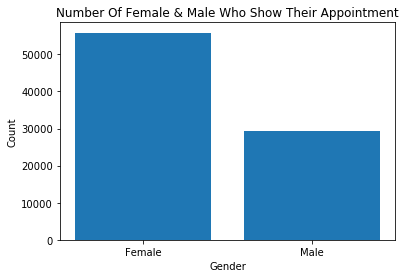

In [13]:
plt.bar(["Female","Male"],show_appointment_groupby_gender)
plt.title("Number Of Female & Male Who Show Their Appointment")
plt.xlabel("Gender")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

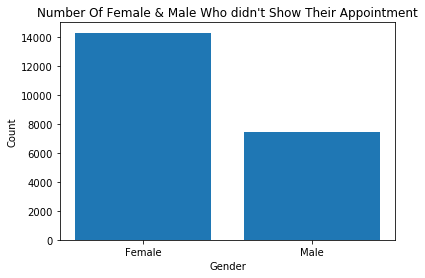

In [14]:
plt.bar(["Female","Male"],no_show_appointment_groupby_gender)
plt.title("Number Of Female & Male Who didn't Show Their Appointment")
plt.xlabel("Gender")
plt.ylabel("Count")

## For Two Charts Above
     number of female is larger than number of male in both cases (showing & not showing) .
     number of female who’re showing their appointment is greater than who didn’t show .
     number of male who’re showing their appointment is greater than who didn’t show .

### Research Question 2  (How Many F&M Who're in scholarship program and Show Their appointment and who aren't ?)

In [15]:
df_appointment['scholarship'].unique(),df_appointment['no_show'].unique()

(array([0, 1]), array(['No', 'Yes'], dtype=object))

In [16]:
register_scholarship = df_appointment.query('scholarship == 1 & no_show == "No"') 
no_register_scholarship = df_appointment.query('scholarship == 0 & no_show == "Yes"') 

In [17]:
register_scholarship_groupby_gender = register_scholarship.groupby('gender').count()['scholarship']
no_register_scholarship_groupby_gender = no_register_scholarship.groupby('gender').count()['scholarship']

Text(0.5, 1.0, 'Number Of Female & Male Who are in scholarship program and show their appointment')

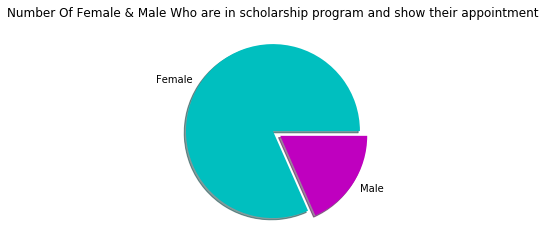

In [39]:
plt.pie(register_scholarship_groupby_gender,labels=["Female","Male"],colors=['c','m'],shadow= True,
explode=(0,0.1))
plt.title("Number Of Female & Male Who are in scholarship program and show their appointment")


Text(0.5, 1.0, "Number Of Female & Male Who are not in scholarship program and didn't show their appointment")

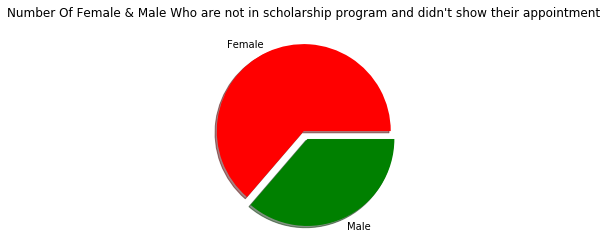

In [40]:
plt.pie(no_register_scholarship_groupby_gender,labels=["Female","Male"],colors=['r','g'],shadow= True,
explode=(0,0.1))
plt.title("Number Of Female & Male Who are not in scholarship program and didn't show their appointment")

### For Two Charts Above
    number of female is larger than number of male in both cases .
    number of female who’re not in scholarship program and not showing their appointment is greater than who did.
    number of male who’re not in scholarship program and not showing their appointment is greater than who did.

### Correlation Between Two Variables (Age,Scholarship)

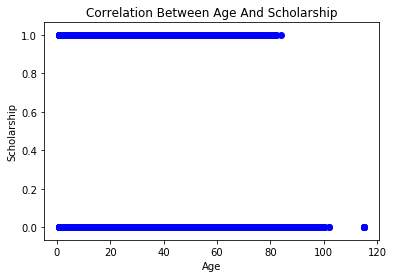

In [26]:
plt.scatter(df_appointment['age'],df_appointment['scholarship'],color='b')
plt.title('Correlation Between Age And Scholarship')
plt.xlabel('Age')
plt.ylabel('Scholarship')
plt.show()

### From The Chart Above Found That There Is No Correlation Between Age And Scholarship (Zero Correlation)

<a id='conclusions'></a>
## Conclusions

> after working with data found that people didn't in scholarship program and didn't show appointment are more than who did and females participate by huge number comparing with males

> Also The Data Was Clear Enough To Answer My Questions 